# Clusterizacion con k-means
Datos de viviendas en california, estados unidos.

In [1]:
import pandas as pd

datos = pd.read_csv("housing.csv")

In [2]:
datos.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


/home/alain/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/alain/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/alain/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='latitude', ylabel='longitude'>

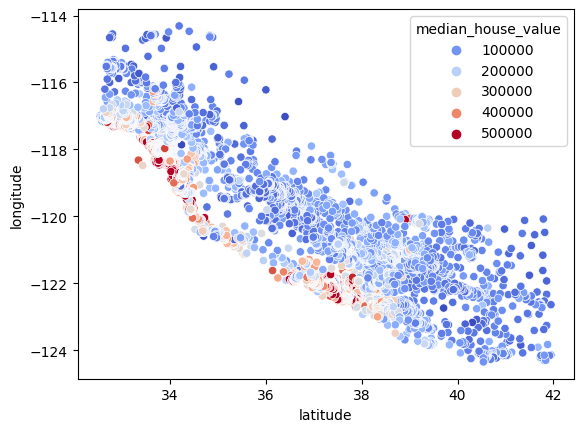

In [3]:
import seaborn as sb

sb.scatterplot(x='latitude', y='longitude', data=datos, hue='median_house_value', palette='coolwarm')

/home/alain/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/alain/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/alain/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='latitude', ylabel='longitude'>

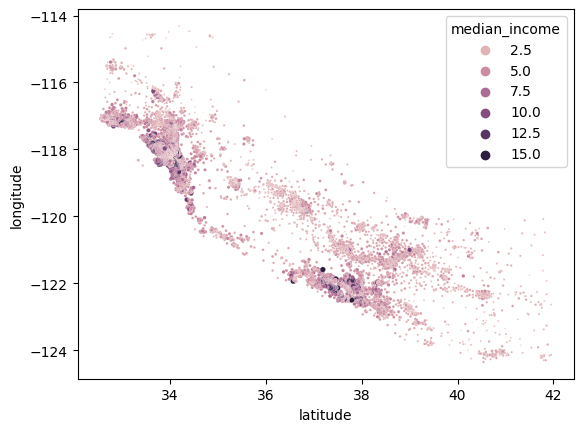

In [4]:
sb.scatterplot(x='latitude', y='longitude', data=datos, hue='median_income', s=datos['median_income'])

- ## Clusterizacion basada en el segmento economico de personas que viven en las casas

In [5]:
datos.loc[:, ['latitude', 'longitude', 'median_income']]

,latitude,longitude,median_income
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462
...,...,...,...
20635,39.48,-121.09,1.5603
20636,39.49,-121.21,2.5568
20637,39.43,-121.22,1.7000
20638,39.43,-121.32,1.8672


In [6]:
x = datos.loc[:, ['latitude', 'longitude', 'median_income']]

from sklearn.cluster import KMeans

modelo = KMeans(n_clusters=6)
predicciones = modelo.fit_predict(x)

/home/alain/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [7]:
predicciones.shape

(20640,)

In [8]:
x['segmento_economico'] = predicciones
x

,latitude,longitude,median_income,segmento_economico
0,37.88,-122.23,8.3252,4
1,37.86,-122.22,8.3014,4
2,37.85,-122.24,7.2574,4
3,37.85,-122.25,5.6431,4
4,37.85,-122.25,3.8462,0
...,...,...,...,...
20635,39.48,-121.09,1.5603,0
20636,39.49,-121.21,2.5568,0
20637,39.43,-121.22,1.7000,0
20638,39.43,-121.32,1.8672,0


In [9]:
x['segmento_economico'].value_counts()

segmento_economico
3    6997
0    4852
1    3854
4    2795
2    1683
5     459
Name: count, dtype: int64

/home/alain/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/alain/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/alain/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/alain/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if

<Axes: xlabel='latitude', ylabel='longitude'>

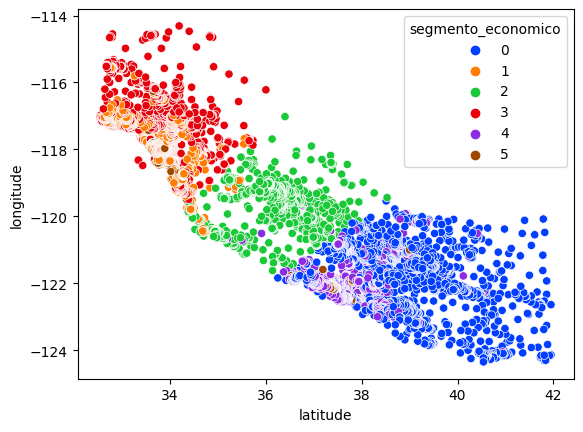

In [10]:
sb.scatterplot(x='latitude', y='longitude', data=x, hue='segmento_economico', palette='bright')

/home/alain/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/alain/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/alain/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='segmento_economico', ylabel='count'>

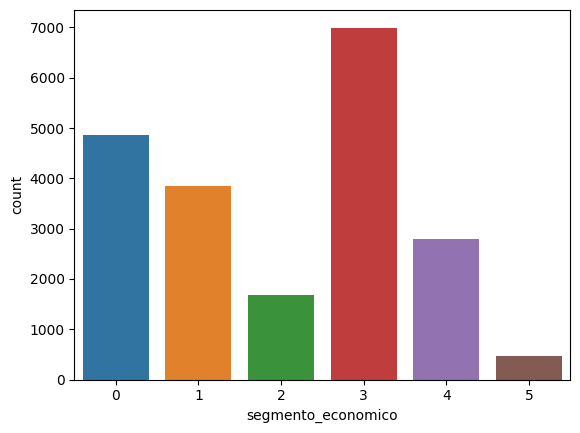

In [11]:
sb.countplot(x='segmento_economico', data=x)

In [12]:
x.groupby(['segmento_economico'])['median_income'].mean()

segmento_economico
0     2.815424
1     5.511683
2     2.669611
3     2.870542
4     5.504655
5    10.946702
Name: median_income, dtype: float64

- ## Clusterizacion basada en la cantidad de personas que viven en las casas

In [41]:
import pandas as pd

datos = pd.read_csv('housing.csv') # leemos el archivo csv con los datos de las casas
datos['pop_per_house'] = datos['population'] / datos['households'] # agregamos la columna personas por casa
x = datos.loc[:, ['latitude', 'longitude', 'pop_per_house']] # particionamos los datos en latitud, longitud y personas por casa

In [42]:
from sklearn.cluster import KMeans

modelo = KMeans(n_clusters=8)
predicciones = modelo.fit_predict(x)
x['cluster'] = predicciones

/home/alain/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/home/alain/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/alain/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/alain/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/alain/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if

<Axes: xlabel='latitude', ylabel='longitude'>

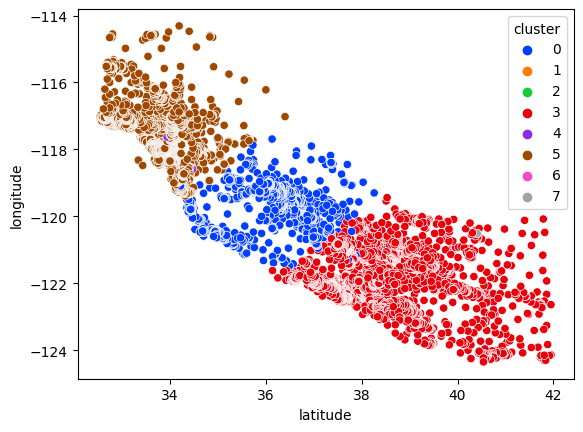

In [43]:
import seaborn as sb

sb.scatterplot(x='latitude', y='longitude', data=x, hue='cluster', palette='bright')